In [10]:
import pandas as pd
import spacy
import matplotlib.pyplot as plt

from spacy.matcher import Matcher
from google.colab import drive


In [11]:
# Load the pre-trained SpaCy model
nlp = spacy.load('en_core_web_sm')

# Define the patterns for matching the specified words for female and male
female_patterns = [
    [{"LOWER": "female"}],
    [{"LOWER": "woman"}],
    [{"LOWER": "girl"}],
    [{"LOWER": "feminine"}],
    [{"LOWER": "lady"}],
    [{"LOWER": "she"}],
    [{"LOWER": "her"}],
    [{"LOWER": "menstruation"}],
    [{"LOWER": "menstrual"}],
    [{"LOWER": "period"}],
    [{"LOWER": "pregnancy"}],
    [{"LOWER": "pregnant"}],
    [{"LOWER": "maternal"}],
    [{"LOWER": "maternity"}],
    [{"LOWER": "ovary"}],
    [{"LOWER": "ovarian"}],
    [{"LOWER": "breast"}],
    [{"LOWER": "breastfeeding"}],
    [{"LOWER": "mammogram"}],
    [{"LOWER": "cervix"}],
    [{"LOWER": "cervical"}],
    [{"LOWER": "uterus"}],
    [{"LOWER": "uterine"}],
    [{"LOWER": "vagina"}],
    [{"LOWER": "vaginal"}],
    [{"LOWER": "menopause"}],
    [{"LOWER": "hormone"}],
    [{"LOWER": "ovulation"}],
    [{"LOWER": "pelvic"}],
    [{"LOWER": "pap"}],
    [{"LOWER": "smear"}],
    [{"LOWER": "gynecology"}],
    [{"LOWER": "gynecological"}],
    [{"LOWER": "gynecologist"}],
    [{"LOWER": "obstetrics"}],
    [{"LOWER": "obstetric"}],
    [{"LOWER": "endometriosis"}],
    [{"LOWER": "urinary"}],
    [{"LOWER": "bladder"}],
    [{"LOWER": "menstrual"}],
    [{"LOWER": "cycle"}],
    [{"LOWER": "pelvis"}],
    [{"LOWER": "fertility"}],
    [{"LOWER": "conception"}],
    [{"LOWER": "pregnancy"}],
    [{"LOWER": "contraception"}],
    [{"LOWER": "menstrual"}],
    [{"LOWER": "cramps"}],
    [{"LOWER": "hormonal"}],
    [{"LOWER": "mood"}],
    [{"LOWER": "prenatal"}],
    [{"LOWER": "postpartum"}],
    [{"LOWER": "breast"}],
    [{"LOWER": "milk"}],
    [{"LOWER": "ovarian"}],
    [{"LOWER": "cervical"}],
    [{"LOWER": "yeast"}]
]

male_patterns = [
    [{"LOWER": "male"}],
    [{"LOWER": "man"}],
    [{"LOWER": "boy"}],
    [{"LOWER": "masculine"}],
    [{"LOWER": "he"}],
    [{"LOWER": "his"}],
    [{"LOWER": "him"}],
    [{"LOWER": "gentleman"}],
    [{"LOWER": "prostate"}],
    [{"LOWER": "testicle"}],
    [{"LOWER": "testicular"}],
    [{"LOWER": "penis"}],
    [{"LOWER": "penile"}],
    [{"LOWER": "erection"}],
    [{"LOWER": "erectile"}],
    [{"LOWER": "sperm"}],
    [{"LOWER": "spermatozoa"}],
    [{"LOWER": "ejaculation"}],
    [{"LOWER": "infertility"}],
    [{"LOWER": "impotence"}],
    [{"LOWER": "libido"}],
    [{"LOWER": "andropause"}],
    [{"LOWER": "prostatectomy"}],
    [{"LOWER": "vasectomy"}],
    [{"LOWER": "testosterone"}],
    [{"LOWER": "hormone"}],
    [{"LOWER": "prostate"}],
    [{"LOWER": "erectile"}],
    [{"LOWER": "dysfunction"}],
    [{"LOWER": "premature"}],
    [{"LOWER": "baldness"}],
    [{"LOWER": "gynecomastia"}],
    [{"LOWER": "prostatitis"}]
]

In [12]:
# Create a Matcher object and add the patterns
matcher_f = Matcher(nlp.vocab)
matcher_m = Matcher(nlp.vocab)
matcher_f.add("Female", female_patterns)
matcher_m.add("Male", male_patterns)

In [13]:
# Function to check if input text contains specified words and determine gender
def check_gender(text):
    doc = nlp(text)
    female_matches = matcher_f(doc)
    male_matches = matcher_m(doc)
    if female_matches:
        return 'F'
    elif male_matches:
        return 'M'
    else:
        return 'X'

## Determine if the question is about self or someone else

In [14]:
# Predefined set of refering expressions
self_word_set = {'i'}
other_word_set = {'she', 'her', 'he', 'his', 'him'}

In [15]:
# Function to check if input text is about the person asking the question or 
# they are asking the question for someone else

def check_patient_reference(text):
    doc = nlp(text)

    # Calculate the frequency of words in the self_word_set
    self_freq = sum(1 for token in doc if token.text.lower() in self_word_set)

    # Calculate the frequency of words in the other_word_set
    other_freq = sum(1 for token in doc if token.text.lower() in other_word_set)

    # If the frequency of using words from 'other_word_set' is more than that of 'self_word_set'
    # then the question is most likely about someone else
    if other_freq > self_freq:
        return 0
    else:
        return 1

In [16]:
%%time

# Mount Google Drive
drive.mount('/content/drive')

# Specify the path to the .feather file
file_path = "/content/drive/MyDrive/diagnose_en_dataset.feather"

# Load the .feather file as a Pandas DataFrame
df = pd.read_feather(file_path)

# Print the DataFrame
df.head()

Mounted at /content/drive
CPU times: user 1.54 s, sys: 1.12 s, total: 2.67 s
Wall time: 21 s


,id,Description,Doctor,Patient
0,0,Q. What does abutment of the nerve root mean?,Hi. I have gone through your query with dilige...,"Hi doctor,I am just wondering what is abutting..."
1,1,"Q. Every time I eat spicy food, I poop blood. ...",Hello. I have gone through your information an...,"Hi doctor, I am a 26 year old male. I am 5 fee..."
2,2,Q. Will Nano-Leo give permanent solution for e...,Hi. For further doubts consult a sexologist on...,"Hello doctor, I am 48 years old. I am experien..."
3,3,Q. Will Kalarchikai cure multiple ovarian cyst...,Hello. I just read your query. See Kalarachi K...,"Hello doctor, I have multiple small cysts in b..."
4,4,Q. I masturbate only by rubbing the tip of the...,Hi. For further doubts consult a sexologist on...,"Hi doctor, During masturbation I just rub the ..."


In [9]:
# df.drop(columns = 'id', inplace=True)

In [17]:
# df_small = df[:500]
# df_small.head()

# Randomly select 100 entries
random_df = df.sample(n=1000)

# Create a new DataFrame with the selected entries
df_small = pd.DataFrame(random_df)

# df_small_random.drop(columns = 'id', inplace=True)

# Check
df_small.head()

,id,Description,Doctor,Patient
234762,234762,How to get rid of the habit of masturbation on...,DearWe understand your concernsI went through ...,I think I might have either gonorrhea or a UTI...
191114,191114,I have burnt like black spot which is spreadin...,Hello Mr.Banerjee; welcome to HealthcareMagic ...,My doughter 18 years old. Now her hemoglobin 4...
103145,103145,How to rule out poisoning after contact with a...,Thanks for your question on Healthcare Magic.I...,"sir ,recently my mother have breathing problem..."
25984,25984,Q. What pills would help my erection last longer?,"Hello, Welcome back to icliniq.com. I have gon...","Hello doctor, I want some pills which will hel..."
31605,31605,Are there pregnancy chances with non penetrati...,"Hello,Thanks for asking at Healthcaremagic!I h...",i put my penis outside of her vagina but i did...


In [18]:
%%time

# Apply the check_gender and check_patient_reference functions to the 'Patient' column
df_small['Gender'] = df_small['Patient'].apply(check_gender)
df_small['Self'] = df_small['Patient'].apply(check_patient_reference)

# Check the updated DataFrame
df_small.head()

CPU times: user 30 s, sys: 110 ms, total: 30.1 s
Wall time: 30.3 s


,id,Description,Doctor,Patient,Gender,Self
234762,234762,How to get rid of the habit of masturbation on...,DearWe understand your concernsI went through ...,I think I might have either gonorrhea or a UTI...,F,1
191114,191114,I have burnt like black spot which is spreadin...,Hello Mr.Banerjee; welcome to HealthcareMagic ...,My doughter 18 years old. Now her hemoglobin 4...,F,1
103145,103145,How to rule out poisoning after contact with a...,Thanks for your question on Healthcare Magic.I...,"sir ,recently my mother have breathing problem...",F,0
25984,25984,Q. What pills would help my erection last longer?,"Hello, Welcome back to icliniq.com. I have gon...","Hello doctor, I want some pills which will hel...",M,1
31605,31605,Are there pregnancy chances with non penetrati...,"Hello,Thanks for asking at Healthcaremagic!I h...",i put my penis outside of her vagina but i did...,F,1


In [19]:
# How many male vs. female vs. unidentified gender labels were generated?
df_small['Gender'].value_counts()

X    416
F    374
M    210
Name: Gender, dtype: int64

In [20]:
# How many self vs. other references were detected?
df_small['Self'].value_counts()

1    781
0    219
Name: Self, dtype: int64

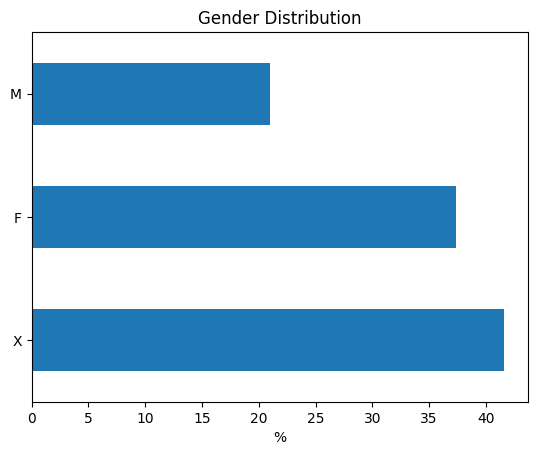

In [21]:
# Calculate the percentages for the three gender options
gender_counts = df_small['Gender'].value_counts() * 100 / df_small['Gender'].value_counts().sum()

# Create a bar plot
gender_counts.plot(kind='barh')

# Set the labels and title
plt.ylabel('')
plt.xlabel('%')
plt.title('Gender Distribution')

# Display the plot
plt.show()

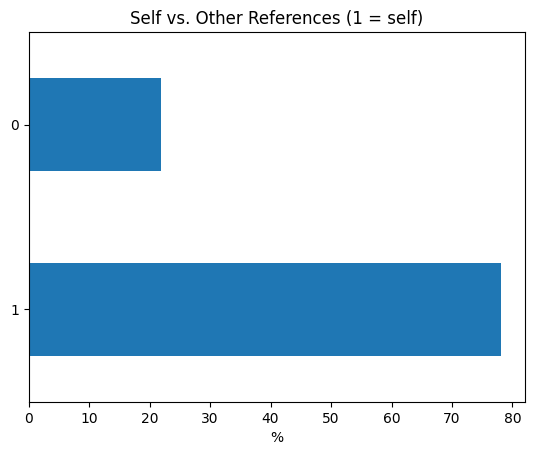

In [22]:
# Calculate the percentages for self vs. other questions
gender_counts = df_small['Self'].value_counts() * 100 / df_small['Self'].value_counts().sum()

# Create a bar plot
gender_counts.plot(kind='barh')

# Set the labels and title
plt.ylabel('')
plt.xlabel('%')
plt.title('Self vs. Other References (1 = self)')

# Display the plot
plt.show()

### Save the data frame as a .csv file

In [23]:
# Specify the path to save the CSV file
output_path = "/content/drive/MyDrive/diagnose_en_dataset-patient_info-random_1000.csv"

# Save the DataFrame as a CSV file
df_small.to_csv(output_path, index=False)

### Save the data frame as a .feather file

In [ ]:
# # Specify the path to save the .feather file
# output_path = "/content/drive/MyDrive/diagnose_en_dataset-patient_info-first_50000.feather"

# # Save the DataFrame as a .feather file
# df_small.to_feather(output_path)


### Check `Gender` and `Reference` classifications:
1. Randomly select *n_sample* entries from the data and classify for Gender and Reference
1. Generate *n_sets* such sets
1. Manually check the classifications in each set

In [21]:
%%time

# Define sizes
n_sample = 50
n_sets = 10

# Gender and Reference classificaiton
for set_num in range(n_sets):
  print(set_num)

  # Randomly select n_sample entries
  random_df = df.sample(n = n_sample)

  # Create a new DataFrame with the selected entries
  df_small = pd.DataFrame(random_df)

  # Apply the check_gender and check_patient_reference functions to the 'Patient' column
  df_small['Gender'] = df_small['Patient'].apply(check_gender)
  df_small['Self'] = df_small['Patient'].apply(check_patient_reference)

  # Add 2 extra columns for manual checking of classification
  df_small['Check_Gender'] = ''
  df_small['Check_Self'] = ''

  df_small.drop(columns = ['Description', 'Doctor'], inplace = True)

  print(df_small['Gender'].value_counts())
  print("")
  print(df_small['Self'].value_counts())

  # Specify the path to save the CSV file
  output_path = "/content/drive/MyDrive/Check_gend_ref_classification/diagnose_en_dataset-patient_info-random_" + str(n_sample) + "-set_" + str(set_num) + ".csv"
  print(output_path)

  # Save the DataFrame as a CSV file
  df_small.to_csv(output_path, index=False)


0
X    22
F    17
M    11
Name: Gender, dtype: int64

1    38
0    12
Name: Self, dtype: int64
/content/drive/MyDrive/Check_gend_ref_classification/diagnose_en_dataset-patient_info-random_50-set_0.csv
1
F    22
X    19
M     9
Name: Gender, dtype: int64

1    36
0    14
Name: Self, dtype: int64
/content/drive/MyDrive/Check_gend_ref_classification/diagnose_en_dataset-patient_info-random_50-set_1.csv
2
X    21
F    19
M    10
Name: Gender, dtype: int64

1    38
0    12
Name: Self, dtype: int64
/content/drive/MyDrive/Check_gend_ref_classification/diagnose_en_dataset-patient_info-random_50-set_2.csv
3
F    22
X    17
M    11
Name: Gender, dtype: int64

1    36
0    14
Name: Self, dtype: int64
/content/drive/MyDrive/Check_gend_ref_classification/diagnose_en_dataset-patient_info-random_50-set_3.csv
4
X    20
F    18
M    12
Name: Gender, dtype: int64

1    42
0     8
Name: Self, dtype: int64
/content/drive/MyDrive/Check_gend_ref_classification/diagnose_en_dataset-patient_info-random_50-set_4